In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df= pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/monthly-cola-production-in-austr.csv')

In [12]:
df.head()

Month  Monthly cola production
0  1956-01                     93.2
1  1956-02                     96.0
2  1956-03                     95.2
3  1956-04                     77.1
4  1956-05                     70.9

In [13]:
df['YearMonth'] = pd.to_datetime(df['Month'])
df.set_index('YearMonth', inplace=True)

In [14]:
df.head()

Month  Monthly cola production
YearMonth                                   
1956-01-01  1956-01                     93.2
1956-02-01  1956-02                     96.0
1956-03-01  1956-03                     95.2
1956-04-01  1956-04                     77.1
1956-05-01  1956-05                     70.9

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly cola production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


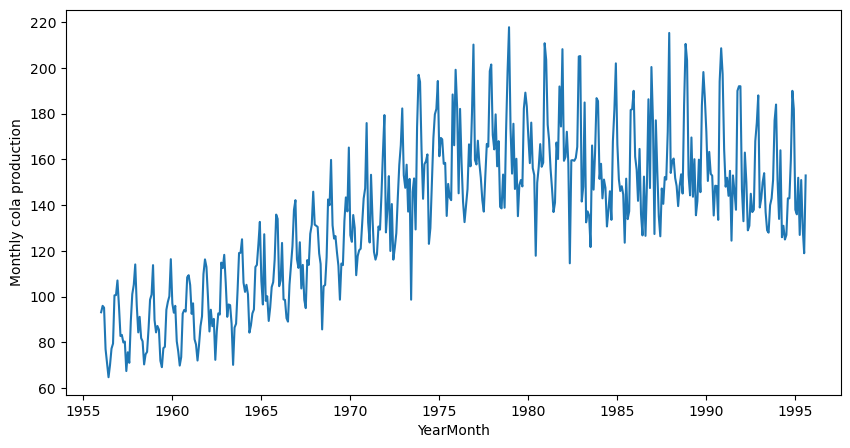

In [15]:
#Visualize the time series
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Monthly cola production'])
plt.show()

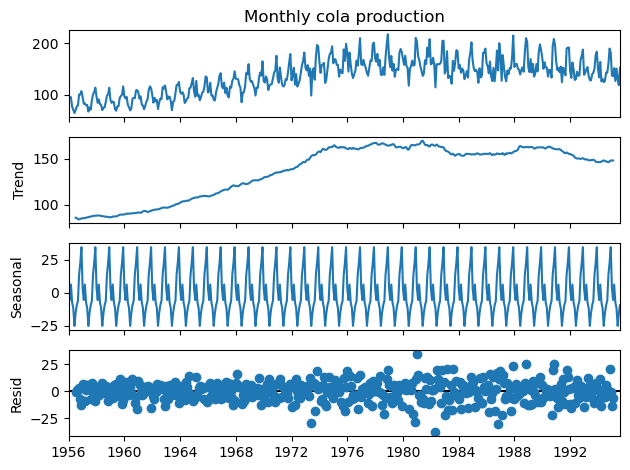

In [16]:
#Check further for seasonality and trend 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df['Monthly cola production'],period=12)
fig=decomposition.plot()
plt.show()

In [20]:
#We see in our graph two pattern:seasonlity and trend
#check further fro seasonality and trend
#calculate and plot mean and sandard deviatation for 12 moths
df['rollMean']=df['Monthly cola production'].rolling(window=12).mean()
df['rollstd']=df['Monthly cola production'].rolling(window=12).std()

print(df['rollMean'])
print(df['rollstd'])

YearMonth
1956-01-01           NaN
1956-02-01           NaN
1956-03-01           NaN
1956-04-01           NaN
1956-05-01           NaN
                 ...    
1995-04-01    146.166667
1995-05-01    147.833333
1995-06-01    148.250000
1995-07-01    147.583333
1995-08-01    148.416667
Name: rollMean, Length: 476, dtype: float64
YearMonth
1956-01-01          NaN
1956-02-01          NaN
1956-03-01          NaN
1956-04-01          NaN
1956-05-01          NaN
                ...    
1995-04-01    21.391729
1995-05-01    20.875533
1995-06-01    20.423360
1995-07-01    21.292160
1995-08-01    21.292160
Name: rollstd, Length: 476, dtype: float64


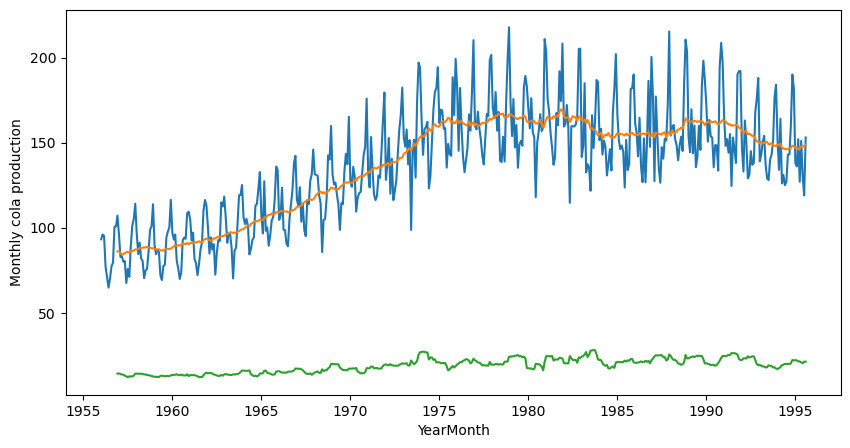

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Monthly cola production'])
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollstd)
plt.show()

## ARIMA

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [23]:
#create columns for one month and one year lagged data
df['firstDiff']=df['Monthly cola production'].diff()

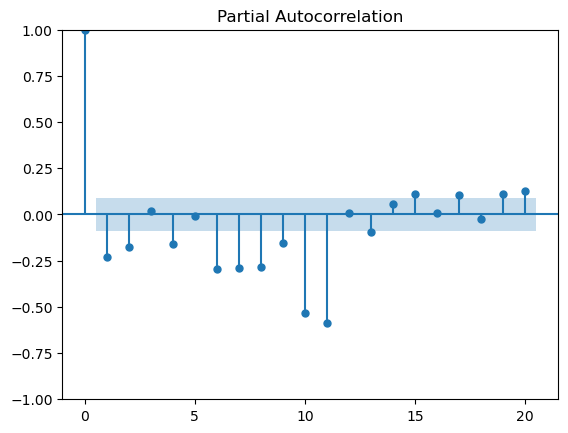

In [25]:
plot_pacf(df['firstDiff'].dropna(),lags=20)
plt.show()

#Shaded area is insignificantarea
#PACF gives us the auto regressive values(i.e. p-Refer to the slides)
#First 'p' is 1 (the x-axis coordinate),whose value is ~0.31 (the y-axis coordinate)
#So,significant p values are 1,2,3,4,6,etc

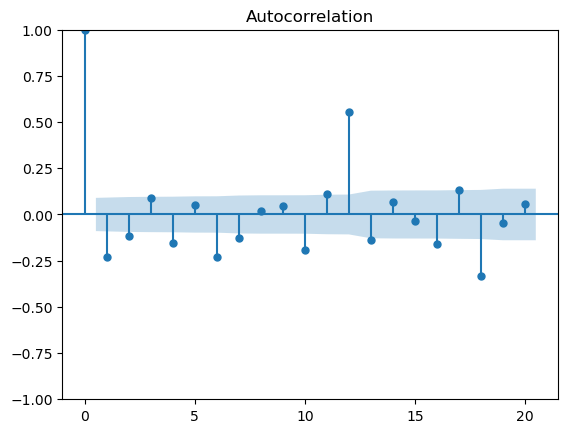

In [26]:
#now let us take this as p and find q,for which we need ACF 
plot_acf(df['firstDiff'].dropna(),lags=20)
plt.show()
#Results of acf are similar to that of pacf
#intepretation: We got q.Significant q values are 1,3,4,8,etc

In [27]:
#Let us take p-1,q=3(both are significant) and d=2(already known)
#Build ARIMA model
train=df[:round(len(df)*70/100)]#Take the first 70% data
print(train.tail()) #Just to check where is ends
test=df[round(len(df)*70/100):] #take the last 30% data,starting from 715
print(test.head()) #Just to check where it starts

              Month  Monthly cola production    rollMean    rollstd  firstDiff
YearMonth                                                                     
1983-05-01  1983-05                    137.3  163.291667  24.009637        4.8
1983-06-01  1983-06                    135.5  161.283333  25.318762       -1.8
1983-07-01  1983-07                    121.7  158.116667  27.790510      -13.8
1983-08-01  1983-08                    166.1  158.675000  27.885778       44.4
1983-09-01  1983-09                    146.8  157.516667  28.082017      -19.3
              Month  Monthly cola production    rollMean    rollstd  firstDiff
YearMonth                                                                     
1983-10-01  1983-10                    162.8  157.291667  28.022992       16.0
1983-11-01  1983-11                    186.8  155.775000  25.593363       24.0
1983-12-01  1983-12                    185.5  154.133333  22.590478       -1.3
1984-01-01  1984-01                    151.5  154.95

In [30]:
model=ARIMA(train['Monthly cola production'],order=(4,2,3)) #Parameters: p,d,q
model_fit=model.fit()
prediction=model_fit.predict(start=test.index[0],end=test.index[-1])
df['arimaPred']=prediction
print(df.tail())



C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


              Month  Monthly cola production    rollMean    rollstd  \
YearMonth                                                             
1995-04-01  1995-04                    127.0  146.166667  21.391729   
1995-05-01  1995-05                    151.0  147.833333  20.875533   
1995-06-01  1995-06                    130.0  148.250000  20.423360   
1995-07-01  1995-07                    119.0  147.583333  21.292160   
1995-08-01  1995-08                    153.0  148.416667  21.292160   

            firstDiff   arimaPred  
YearMonth                          
1995-04-01      -25.0  165.794477  
1995-05-01       24.0  174.441203  
1995-06-01      -21.0  169.350322  
1995-07-01      -11.0  170.116564  
1995-08-01       34.0  174.473912  


C:\ProgramData\New folder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


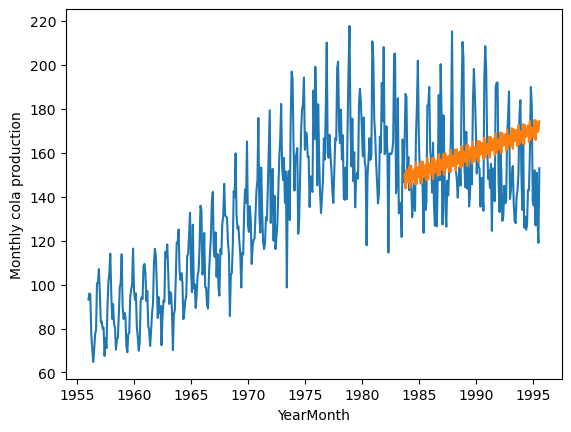

In [35]:
#Plot
sns.lineplot(data=df,x=df.index,y='Monthly cola production')
sns.lineplot(data=df,x=df.index,y='arimaPred')
plt.show()

## SARIMAX

In [36]:
#Create columns for one month and one year lagged data
df['firstDiff']=df['Monthly cola production'].diff()
df['Diff12']=df['Monthly cola production'].diff(12)
df.head(20)

Month  Monthly cola production   rollMean    rollstd  firstDiff  \
YearMonth                                                                       
1956-01-01  1956-01                     93.2        NaN        NaN        NaN   
1956-02-01  1956-02                     96.0        NaN        NaN        2.8   
1956-03-01  1956-03                     95.2        NaN        NaN       -0.8   
1956-04-01  1956-04                     77.1        NaN        NaN      -18.1   
1956-05-01  1956-05                     70.9        NaN        NaN       -6.2   
1956-06-01  1956-06                     64.8        NaN        NaN       -6.1   
1956-07-01  1956-07                     70.1        NaN        NaN        5.3   
1956-08-01  1956-08                     77.3        NaN        NaN        7.2   
1956-09-01  1956-09                     79.5        NaN        NaN        2.2   
1956-10-01  1956-10                    100.6        NaN        NaN       21.1   
1956-11-01  1956-11                    100.7        NaN        NaN        0.1   
1956-12-01  1956-12                    107.1  86.041667  14.264798        6.4   
1957-01-01  1957-01                     95.9  86.266667  14.408541      -11.2   
1957-02-01  1957-02                     82.8  85.166667  14.098442      -13.1   
1957-03-01  1957-03                     83.3  84.175000  13.742577        0.5   
1957-04-01  1957-04                     80.0  84.416667  13.631903       -3.3   
1957-05-01  1957-05                     80.4  85.208333  13.038506        0.4   
1957-06-01  1957-06                     67.5  85.433333  12.672471      -12.9   
1957-07-01  1957-07                     75.7  85.900000  12.148775        8.2   
1957-08-01  1957-08                     71.1  85.383333  12.668489       -4.6   

            arimaPred  Diff12  
YearMonth                      
1956-01-01        NaN     NaN  
1956-02-01        NaN     NaN  
1956-03-01        NaN     NaN  
1956-04-01        NaN     NaN  
1956-05-01        NaN     NaN  
1956-06-01        NaN     NaN  
1956-07-01        NaN     NaN  
1956-08-01        NaN     NaN  
1956-09-01        NaN     NaN  
1956-10-01        NaN     NaN  
1956-11-01        NaN     NaN  
1956-12-01        NaN     NaN  
1957-01-01        NaN     2.7  
1957-02-01        NaN   -13.2  
1957-03-01        NaN   -11.9  
1957-04-01        NaN     2.9  
1957-05-01        NaN     9.5  
1957-06-01        NaN     2.7  
1957-07-01        NaN     5.6  
1957-08-01        NaN    -6.2

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

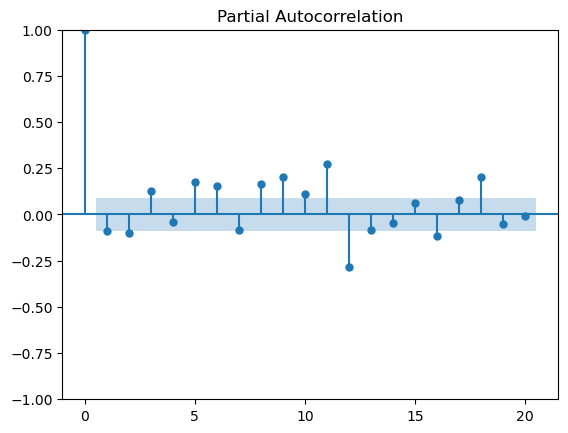

In [39]:
plot_pacf(df['Diff12'].dropna(),lags=20)
plt.show()

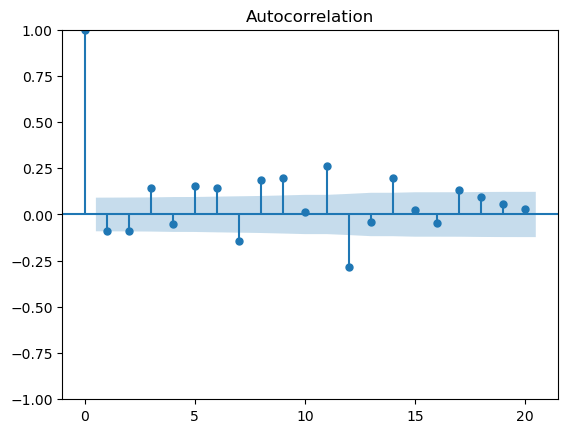

In [41]:
plot_acf(df['Diff12'].dropna(),lags=20)
plt.show()

In [42]:
train=df[:round(len(df)*70/100)]  # take the first 70%data
test=df[round(len(df)*70/100):] #take the last 30% data,starting from 71%
print(test.head()) #Just to check where it starts

              Month  Monthly cola production    rollMean    rollstd  \
YearMonth                                                             
1983-10-01  1983-10                    162.8  157.291667  28.022992   
1983-11-01  1983-11                    186.8  155.775000  25.593363   
1983-12-01  1983-12                    185.5  154.133333  22.590478   
1984-01-01  1984-01                    151.5  154.958333  22.269647   
1984-02-01  1984-02                    158.1  155.791667  22.176583   

            firstDiff   arimaPred  Diff12  
YearMonth                                  
1983-10-01       16.0  150.294478    -2.7  
1983-11-01       24.0  143.721515   -18.2  
1983-12-01       -1.3  152.390215   -19.7  
1984-01-01      -34.0  148.595024     9.9  
1984-02-01        6.6  146.476701    10.0  


In [43]:
#now SARIMAX prediction
model=SARIMAX(train['Monthly cola production'],order=(1,2,1),seasonal_order=(1,2,1,12)) #Parameters: p,d,q
model_fit=model.fit()
prediction=model_fit.predict(start=test.index[0],end=test.index[-1])
df['sarimaxPred']=prediction
print(df.tail())




C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


              Month  Monthly cola production    rollMean    rollstd  \
YearMonth                                                             
1995-04-01  1995-04                    127.0  146.166667  21.391729   
1995-05-01  1995-05                    151.0  147.833333  20.875533   
1995-06-01  1995-06                    130.0  148.250000  20.423360   
1995-07-01  1995-07                    119.0  147.583333  21.292160   
1995-08-01  1995-08                    153.0  148.416667  21.292160   

            firstDiff   arimaPred  Diff12  sarimaxPred  
YearMonth                                               
1995-04-01      -25.0  165.794477     1.0   -99.239978  
1995-05-01       24.0  174.441203    20.0  -112.395503  
1995-06-01      -21.0  169.350322     5.0   -94.241648  
1995-07-01      -11.0  170.116564    -8.0  -113.734657  
1995-08-01       34.0  174.473912    10.0   -71.139088  


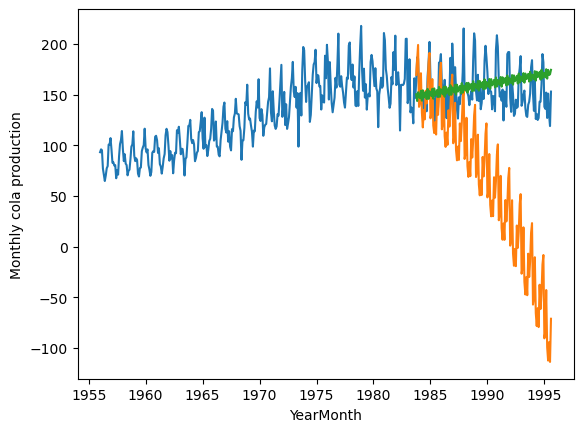

In [44]:
#Data looks better 
#Plot
sns.lineplot(data=df,x=df.index,y='Monthly cola production')
sns.lineplot(data=df,x=df.index,y='sarimaxPred')
sns.lineplot(data=df,x=df.index,y='arimaPred')
plt.show()

In [48]:
#Compared to ARIMA ,SARIMAX is much better 
#Future prediction
#Firts check the last date in our dataset
print(df.tail())
print(df.head())

              Month  Monthly cola production    rollMean    rollstd  \
YearMonth                                                             
1995-04-01  1995-04                    127.0  146.166667  21.391729   
1995-05-01  1995-05                    151.0  147.833333  20.875533   
1995-06-01  1995-06                    130.0  148.250000  20.423360   
1995-07-01  1995-07                    119.0  147.583333  21.292160   
1995-08-01  1995-08                    153.0  148.416667  21.292160   

            firstDiff   arimaPred  Diff12  sarimaxPred  
YearMonth                                               
1995-04-01      -25.0  165.794477     1.0   -99.239978  
1995-05-01       24.0  174.441203    20.0  -112.395503  
1995-06-01      -21.0  169.350322     5.0   -94.241648  
1995-07-01      -11.0  170.116564    -8.0  -113.734657  
1995-08-01       34.0  174.473912    10.0   -71.139088  
              Month  Monthly cola production  rollMean  rollstd  firstDiff  \
YearMonth                

In [49]:
#MA:month start frequency 
#create a dataframe to hold index values from 01.01.61 to 01.12.62
futureDate =pd.DataFrame(pd.date_range(start='1956-01-01',end='1995-08-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
print(futureDate.head())

Empty DataFrame
Columns: []
Index: [1956-01-01 00:00:00, 1956-02-01 00:00:00, 1956-03-01 00:00:00, 1956-04-01 00:00:00, 1956-05-01 00:00:00]


In [50]:
#predict and print
print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))

1956-01-01      0.000000
1956-02-01    163.071843
1956-03-01     98.859522
1956-04-01     94.375053
1956-05-01     59.027499
                 ...    
1995-04-01    -99.239978
1995-05-01   -112.395503
1995-06-01    -94.241648
1995-07-01   -113.734657
1995-08-01    -71.139088
Freq: MS, Name: predicted_mean, Length: 476, dtype: float64


In [51]:
df=df.dropna()

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:
#arima evaluation
mae=mean_absolute_error(df['Monthly cola production'],df['arimaPred'])
rmse=mean_squared_error(df['Monthly cola production'],df['arimaPred'],squared=False)
mape=(abs((df['Monthly cola production']-df['arimaPred'])/df['arimaPred']).mean())*100
r2=r2_score(df['Monthly cola production'],df['arimaPred'])
print(f"ARIMA MAE :{mae},RMSE:{rmse},MAPE:{mape}%,R^2:{r2}")

ARIMA MAE :19.614511920346047,RMSE:23.601661770815895,MAPE:12.202470616531258%,R^2:-0.20399834282748253


C:\ProgramData\New folder\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
#Sarimax Evaluation
mae=mean_absolute_error(df['Monthly cola production'],df['sarimaxPred'])
rmse=mean_squared_error(df['Monthly cola production'],df['sarimaxPred'],squared=False)
mape=(abs((df['Monthly cola production']-df['sarimaxPred'])/df['sarimaxPred']).mean())*100
r2=r2_score(df['Monthly cola production'],df['sarimaxPred'])
print(f"SARIMAX MAE :{mae},RMSE:{rmse},MAPE:{mape}%,R^2:{r2}")

SARIMAX MAE :95.03972316205359,RMSE:116.44362118036733,MAPE:518.6403833990075%,R^2:-28.30705166901488


C:\ProgramData\New folder\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
